In [3]:
# Import necessary libraries

#! pip install pycaret full 
import pycaret
#! pip install pandas
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
! pip install pycaret[analysis]
! pip install gradio

  Using cached fairlearn-0.7.0-py3-none-any.whl (177 kB)
  Using cached explainerdashboard-0.4.2.1-py3-none-any.whl (286 kB)
  Using cached deepchecks-0.13.1-py3-none-any.whl (7.7 MB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached interpret-0.3.2-py3-none-any.whl (1.4 kB)
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached statsmodels-0.13.5-cp39-cp39-win_amd64.whl (9.2 MB)
  Using cached PyNomaly-0.3.3-py3-none-any.whl
  Using cached dash_auth-2.0.0-py3-none-any.whl (3.4 kB)
  Using cached dtreeviz-2.2.1-py3-none-any.whl (91 kB)
  Using cached dash_bootstrap_components-1.4.1-py3-none-any.whl (220 kB)
  Using cached flask_simplelogin-0.1.1-py3-none-any.whl (7.2 kB)
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached salib-1.4.7-py3-none-any.whl (757 kB)
  Using cached skope_rules-1.0.1-py3-none-any.whl (14 kB)
  Using cached dash_cytoscape-0.3.0-py3-none-any.whl (3.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mj943\\Anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
# Import dataset & choosing desired parameters to analyze
df = pd.read_csv("Database.csv")
df = df[['Micro Pollutant', 'MP Category', 'Initial Concentration of MP (mg/L)', 'Compound MW (g/mol)', 'Compound Charge', 'Initial FS pH', 'Initial DS pH','Type of MB', 'MB Contact Angle (°)', 'MB Zeta Potential (mV)', 'Draw Solution', 'DS MW (g mol-1)', 'DS Concentration (M)', 'Operating Time (h)', 'Cross Flow Velocity (cm/s)','Water Flux, Jw (LMH)','Reverse Salt Flux, Js (gMH)','Temperature (⁰C)', 'Removal Rate (%)']]
df

,Micro Pollutant,MP Category,Initial Concentration of MP (mg/L),Compound MW (g/mol),Compound Charge,Initial FS pH,Initial DS pH,Type of MB,MB Contact Angle (°),MB Zeta Potential (mV),Draw Solution,DS MW (g mol-1),DS Concentration (M),Operating Time (h),Cross Flow Velocity (cm/s),"Water Flux, Jw (LMH)","Reverse Salt Flux, Js (gMH)",Temperature (⁰C),Removal Rate (%)
0,Atenolol,β-Blockers,0.01000,266.34,1,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,80
1,Atrazine,Herbicide,0.01000,216.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,77
2,Primidone,Anticonvulsant,0.01000,218.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,90
3,Caffeine,Stimulant,0.01000,194.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,81
4,Atenolol,β-Blockers,0.01000,266.34,1,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,2.0,10.0,8.5,9.5,0.08,20.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Sulfamethoxazole,Antibiotics,0.01220,253.28,-1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100
230,Trimethoprim,Antibiotics,0.01070,290.32,1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,99
231,Carbamazepine,Anticonvulsant,0.01370,236.27,0,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100
232,Ibuprofen,Nonsteroidal anti-inflammatory,0.01220,206.29,-1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100


<Figure size 2500x2500 with 0 Axes>

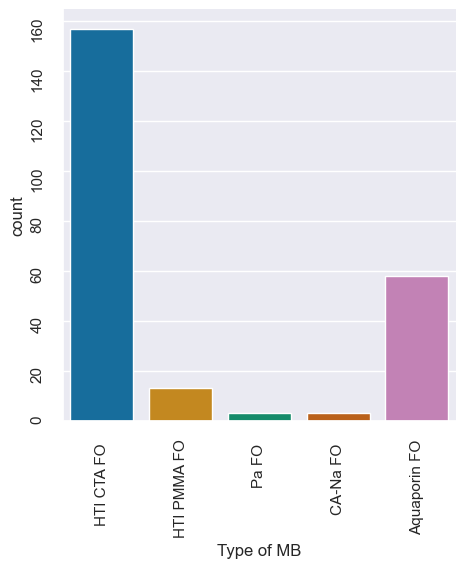

<Figure size 2500x2500 with 0 Axes>

In [16]:
sns.set(font_scale=1)
sns.catplot(x='Type of MB' ,kind="count",data=df,palette="colorblind")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.figure(figsize=(25,25))

<AxesSubplot:xlabel='Initial Concentration of MP (mg/L)', ylabel='Water Flux, Jw (LMH)'>

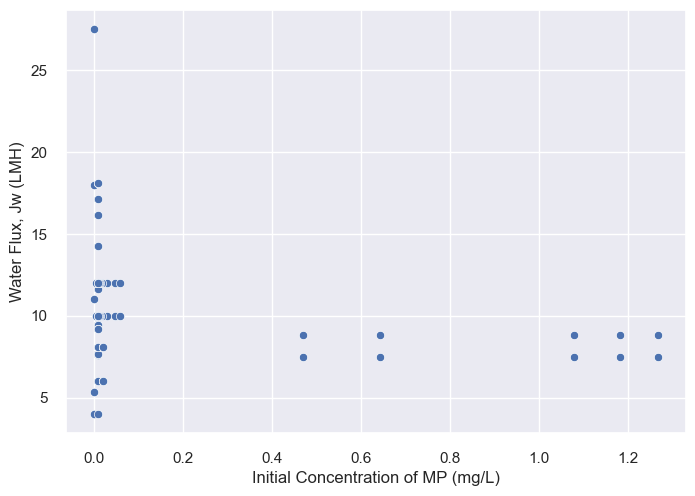

In [5]:
sns.scatterplot(x="Initial Concentration of MP (mg/L)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Compound MW (g/mol)', ylabel='Water Flux, Jw (LMH)'>

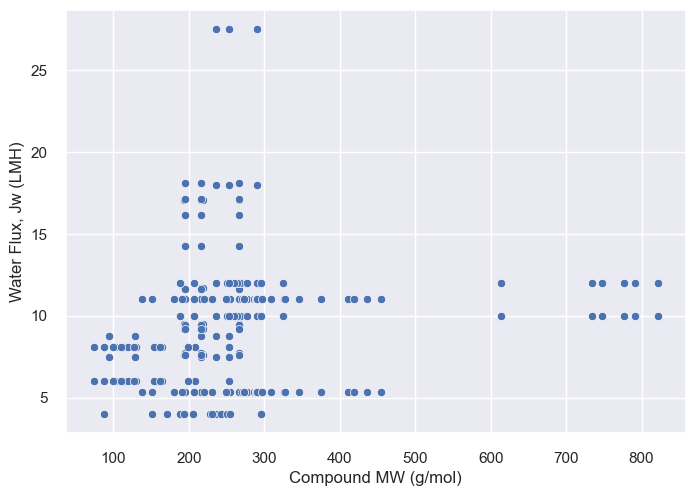

In [6]:
sns.scatterplot(x="Compound MW (g/mol)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Type of MB', ylabel='Water Flux, Jw (LMH)'>

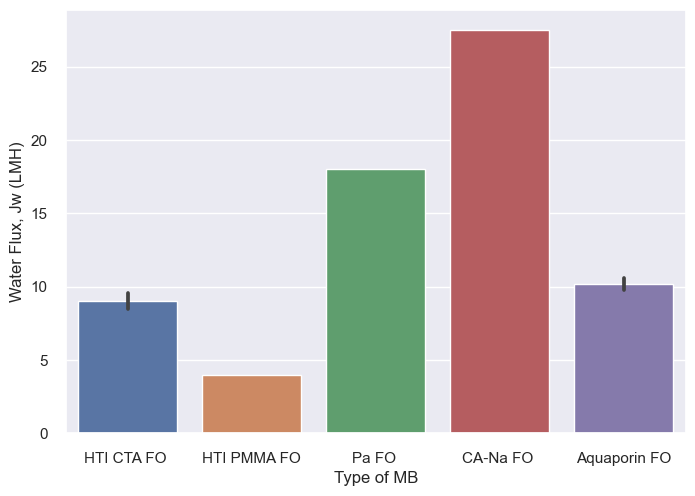

In [4]:
sns.barplot(x="Type of MB", y="Water Flux, Jw (LMH)", data=df)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monoammonium phosphate (MAP)'),
  Text(1, 0, 'Diammonium phosphate (DAP)'),
  Text(2, 0, 'Potassium chloride (KCl)'),
  Text(3, 0, 'Red Sea water'),
  Text(4, 0, 'NaCl'),
  Text(5, 0, 'MgCl2'),
  Text(6, 0, '\xa0mono-ammonium phosphate (MAP)')])

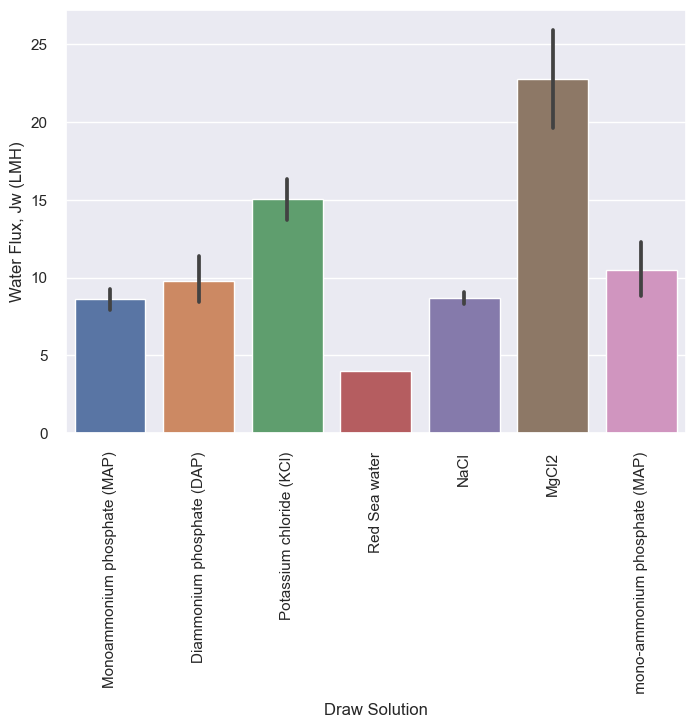

In [5]:
sns.barplot(x="Draw Solution", y="Water Flux, Jw (LMH)", data=df)
plt.xticks(rotation=90)




<AxesSubplot:xlabel='DS MW (g mol-1)', ylabel='Water Flux, Jw (LMH)'>

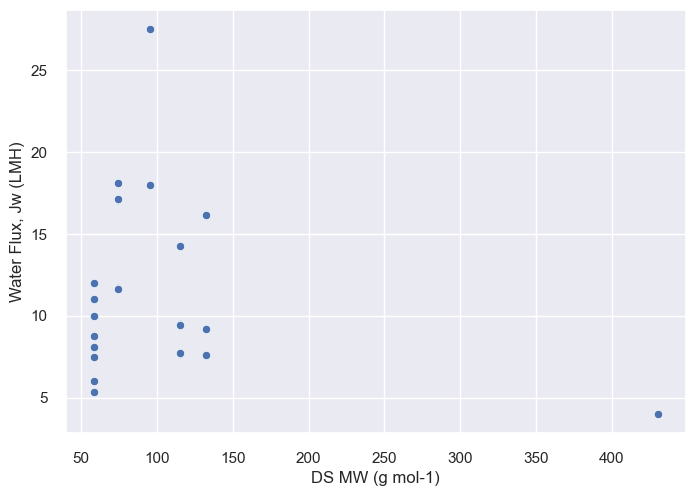

In [12]:
sns.scatterplot(x="DS MW (g mol-1)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='DS Concentration (M)', ylabel='Water Flux, Jw (LMH)'>

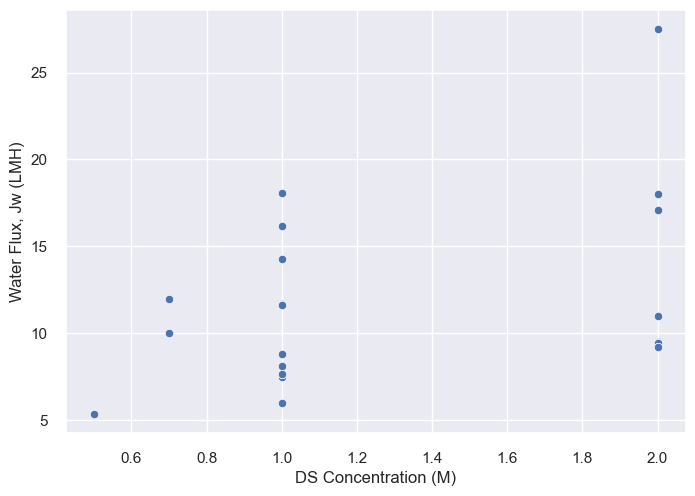

In [13]:
sns.scatterplot(x="DS Concentration (M)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Operating Time (h)', ylabel='Water Flux, Jw (LMH)'>

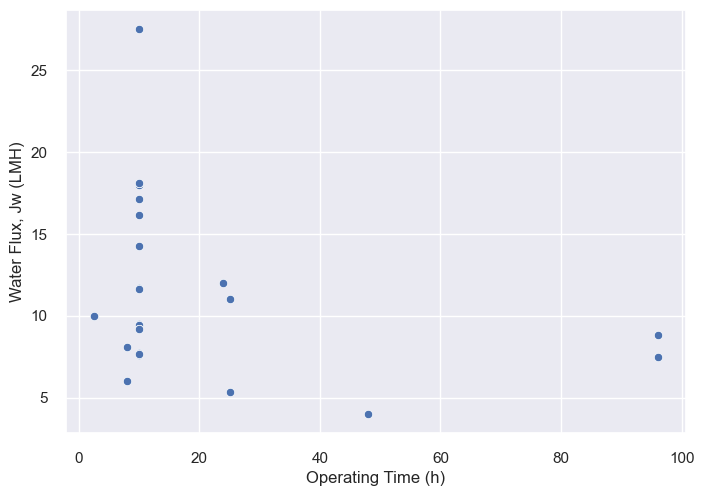

In [14]:
sns.scatterplot(x="Operating Time (h)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Cross Flow Velocity (cm/s)', ylabel='Water Flux, Jw (LMH)'>

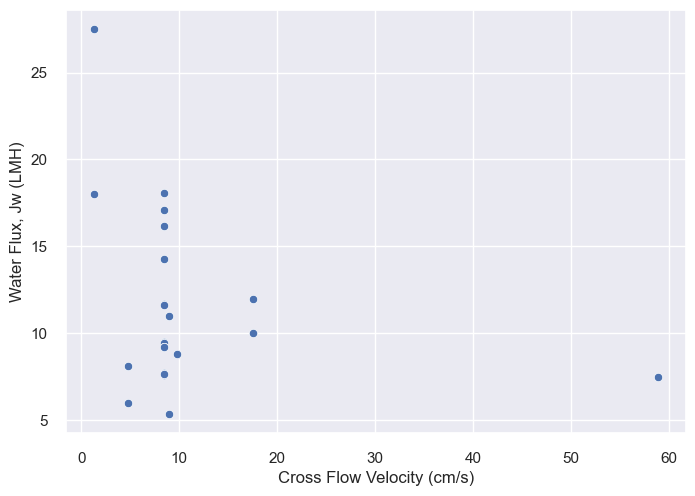

In [15]:
sns.scatterplot(x="Cross Flow Velocity (cm/s)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Reverse Salt Flux, Js (gMH)', ylabel='Water Flux, Jw (LMH)'>

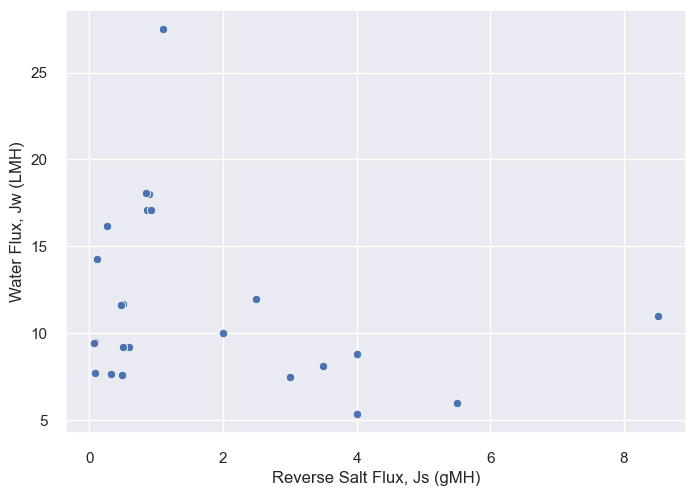

In [16]:
sns.scatterplot(x="Reverse Salt Flux, Js (gMH)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Temperature (⁰C)', ylabel='Water Flux, Jw (LMH)'>

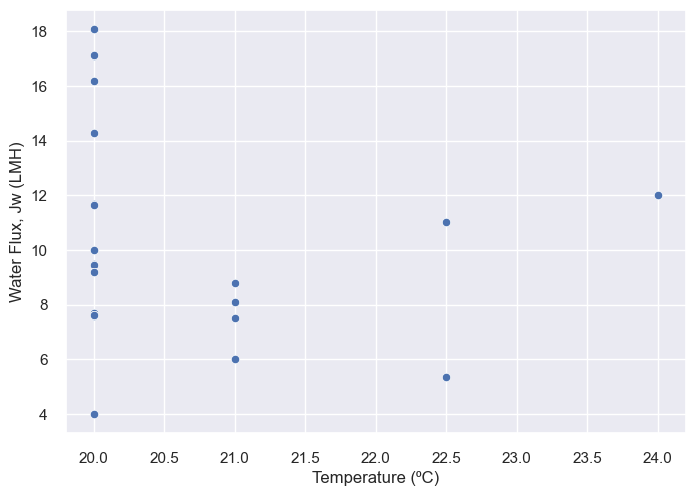

In [17]:
sns.scatterplot(x="Temperature (⁰C)", y="Water Flux, Jw (LMH)", data=df)


<AxesSubplot:xlabel='Removal Rate (%)', ylabel='Water Flux, Jw (LMH)'>

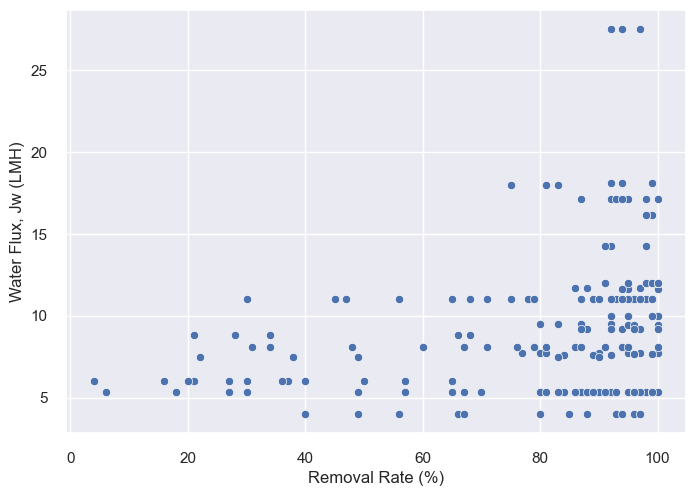

In [18]:
sns.scatterplot(x="Removal Rate (%)", y="Water Flux, Jw (LMH)", data=df)


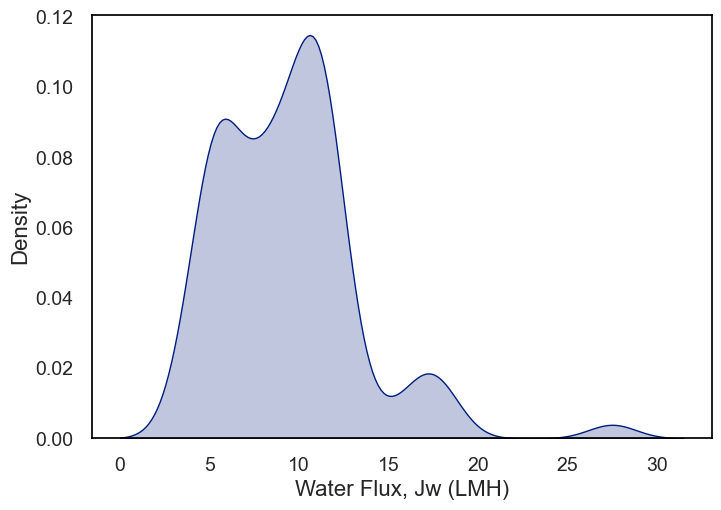

In [49]:
sns.set_style("darkgrid", {"axes.facecolor": "01"})
sns.set_palette("dark")
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
sns.kdeplot(data=df['Water Flux, Jw (LMH)'], shade=True)
ax.set_xlabel('Water Flux, Jw (LMH)', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

plt.show()




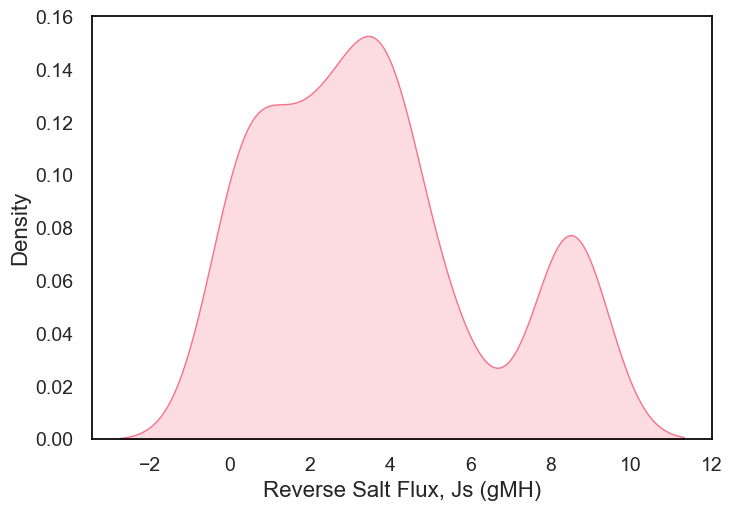

In [53]:
sns.set_style("darkgrid", {"axes.facecolor": "01"})
sns.set_palette("husl")
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
sns.kdeplot(data=df['Reverse Salt Flux, Js (gMH)'], shade=True)
ax.set_xlabel('Reverse Salt Flux, Js (gMH)', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

plt.show()




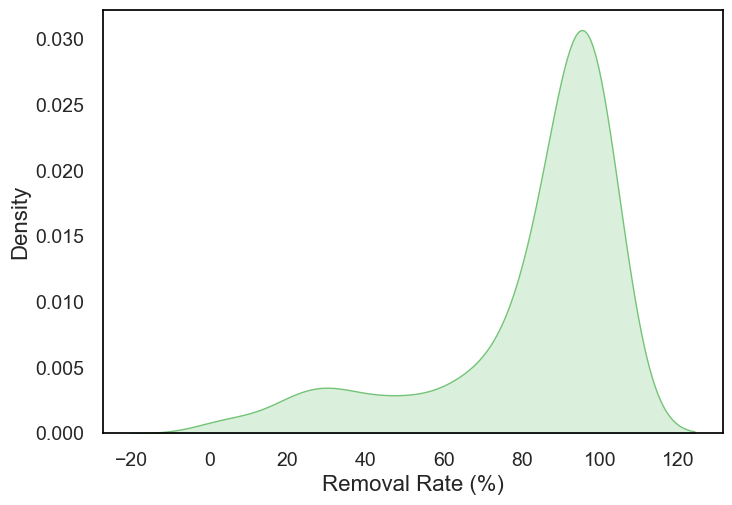

In [60]:
sns.set_style("darkgrid", {"axes.facecolor": "01"})
sns.set_palette("Greens", 1)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
sns.kdeplot(data=df['Removal Rate (%)'], shade=True)
ax.set_xlabel('Removal Rate (%)', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

plt.show()




In [10]:
# Setting up the model by choosing water flux (Jw) as the prediction target

setup(data = df,target = 'Water Flux, Jw (LMH)',session_id = 123)

,Description,Value
0,Session id,123
1,Target,"Water Flux, Jw (LMH)"
2,Target type,Regression
3,Original data shape,"(234, 19)"
4,Transformed data shape,"(234, 50)"
5,Transformed train set shape,"(163, 50)"
6,Transformed test set shape,"(71, 50)"
7,Numeric features,14
8,Categorical features,4
9,Rows with missing values,86.3%


In [11]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7145,2.0603,1.4354,0.9139,0.0929,0.0561
1,0.1587,0.0508,0.2254,0.9930,0.0307,0.0241
2,0.4665,1.0042,1.0021,0.9398,0.0632,0.0401
3,0.2615,0.2136,0.4622,0.9878,0.0417,0.0268
4,0.2930,0.5159,0.7183,0.9306,0.0547,0.0280
5,0.4886,0.9573,0.9784,0.9319,0.0631,0.0409
6,0.8533,3.9469,1.9867,0.8651,0.1569,0.0819
7,0.2374,0.3369,0.5804,0.9643,0.0394,0.0238
8,0.2706,0.3343,0.5782,0.9473,0.0439,0.0246


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
dashboard(gbr)

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [21]:
create_app(gbr)

ModuleNotFoundError: 
'gradio' is a soft dependency and not included in the pycaret installation. Please run: `pip install gradio` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`